<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lab1---Práctica-Descenso-del-gradiente" data-toc-modified-id="Lab1---Práctica-Descenso-del-gradiente-1">Lab1 - Práctica Descenso del gradiente</a></span><ul class="toc-item"><li><span><a href="#Objetivo-de-la-práctica" data-toc-modified-id="Objetivo-de-la-práctica-1.1">Objetivo de la práctica</a></span></li><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1.2">Librerías</a></span></li><li><span><a href="#Carga-del-dataset" data-toc-modified-id="Carga-del-dataset-1.3">Carga del dataset</a></span></li><li><span><a href="#Observación-del-dataframe" data-toc-modified-id="Observación-del-dataframe-1.4">Observación del dataframe</a></span></li><li><span><a href="#Ejercicio" data-toc-modified-id="Ejercicio-1.5">Ejercicio</a></span><ul class="toc-item"><li><span><a href="#Definición-función-Sigmoide" data-toc-modified-id="Definición-función-Sigmoide-1.5.1">Definición función Sigmoide</a></span></li><li><span><a href="#Definición-de-función-de-coste" data-toc-modified-id="Definición-de-función-de-coste-1.5.2">Definición de función de coste</a></span></li><li><span><a href="#Definición-del-descenso-del-gradiente" data-toc-modified-id="Definición-del-descenso-del-gradiente-1.5.3">Definición del descenso del gradiente</a></span></li><li><span><a href="#Representación-gráfica" data-toc-modified-id="Representación-gráfica-1.5.4">Representación gráfica</a></span></li></ul></li></ul></li><li><span><a href="#Referencias" data-toc-modified-id="Referencias-2">Referencias</a></span></li></ul></div>

# Lab1 - Práctica Descenso del gradiente

##### Autor: Diego Senso González
##### 13 de noviembre de 2020
##### Asignatura: Machine Learning - Máster de Data Science para finanzas

## Objetivo de la práctica
El objetivo de la presente práctica es programar el descenso del gradiente en Python. Se tratará de representar la función de coste gráficamente, observando los valores que esta toma y cómo reacciona según el número de iteraciones que se incluyan posteriormente.

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Carga del dataset

In [2]:
data = pd.read_csv("../data/data.csv", delimiter=';')

## Observación del dataframe

Se realiza una breve observación del dataframe.

In [3]:
data

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


El presente dataset está conformado por una serie de calificaciones y una variable categórica que toma valores 0 y 1. Cada observación es una combinación de dos calificaciones (Score-1 y Score-2), además de una indicación sobre si el alumno está admitido en la universidad o no. Concretamente, el dataset en cuestión cuenta con las siguientes variables:

- Score-1. Hace referencia a puntuaciones o calificaciones.
- Score-2. Puntuaciones o calificaciones, en el mismo sentido que Score-1.
- Label. Variable categórica que toma el valor de 1 para señalar si el alumno está admitido y de 0 en caso de que no esté.

Gracias a la función "info" se puede lograr más información relevante sobre el dataframe, como por ejemplo los tipos de datos, la presencia de valores nulos, o el número de observaciones, entre otros.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [5]:
data.isna().sum()

score-1    0
score-2    0
label      0
dtype: int64

Se confirma que no existen valores nulos o NA, por lo que se puede continuar con la práctica. A continuación, tratamos de ver cuántas observaciones y variables hay disponibles, además de ver cómo de grande es el dataset ante el que nos encontramos.

In [6]:
data.shape, data.size

((100, 3), 300)

Podemos también observar de forma gráfica las notas de Score-1 con respecto a Score-2. 

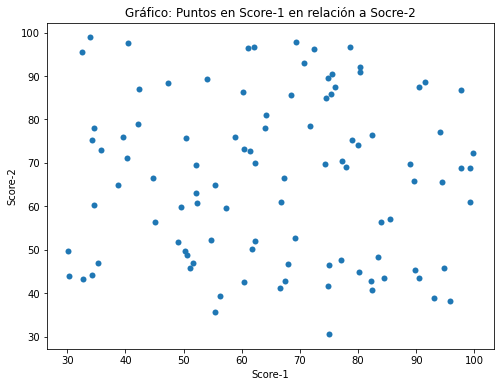

In [22]:
f, ax = plt.subplots(figsize=(8, 6))  #Tamaño del gráfico
sns.scatterplot(x=data['score-1'],
                y=data['score-2'],
                sizes=(1, 8),
                linewidth=0,
                data=data)

plt.xlabel("Score-1")  #Títutlo del eje X.
plt.ylabel("Score-2")  #Títutlo del eje Y.
plt.title("Gráfico: Puntos en Score-1 en relación a Socre-2");
#título del gráfico.

## Ejercicio
Para comenzar, asignamos los valores de las columnas de calificaciones a un nuevo objeto. Hacemos lo propio con la variable categórica.

In [8]:
notas = data[['score-1', 'score-2']].values
admitido = data['label'].values

### Definición función Sigmoide

En primer lugar, se procede a definir la función sigmoide. 

In [9]:
def funcion_sigmoide(x):
    return 1 / (1 + np.exp(-x))

### Definición de función de coste

A continuación se define la función de coste, que será la que acabe quedando representada. El objetivo de la práctica es observar los diferentes valores que toma esta función para después estudiar con qué número de iteraciones observamos que comienza a descender. Será interesante, además, variar el número de iteraciones para observar a qué velocidad baja la función, y en qué punto ya el descenso es insignificante pese a introducir mayor número de iteraciones, o cuál es el número de iteraciones óptimas.

In [10]:
def funcion_coste(theta, x, y):
    m = len(y) #Número de observaciones de Y.
    prediccion_y = funcion_sigmoide(np.dot(x , theta)) #Predicción de Y dándole valores la función sigmoide anterior.
    error = (y * np.log(prediccion_y)) + ((1 - y) * np.log(1 - prediccion_y)) #Cálculo del error
    coste = -1 / m * sum(error) #Cálculo del coste
    gradiente = 1 / m * np.dot(x.transpose(), (prediccion_y - y)) #Gradiente
    return coste[0] , gradiente #La función devuelve los valores del coste y del gradiente en ese momento.

En este punto hay que calcular el valor de la función de coste al inicio que luego se debe minimizar.

In [11]:
mean_notas = np.mean(notas, axis=0) #Media
std_notas = np.std(notas, axis=0) #Desviación Típica
notas = (notas - mean_notas) / std_notas #Estandarización

filas = notas.shape[0]
columnas = notas.shape[1]

X = np.append(np.ones((filas, 1)), notas, axis=1) #Se define el valor de X y de y
y = admitido.reshape(filas, 1)

theta_init = np.zeros((columnas + 1, 1)) #Creación de theta inicialcon valores de 0. 
coste, gradiente = funcion_coste(theta_init, X, y) #la función de costes da valors tanto al coste como al gradiente que 
#inicialmente se habían definido, pero que verán sus valores cambiar por la función de coste. Nos da el coste al inicio
#y el valor del gradiente.

print("Coste al inicio:", coste) #Da el resultado del coste inicial.
print("Gradiente al inicio:", gradiente) #Da el resultado del gradiente al inicio.

Coste al inicio: 0.693147180559946
Gradiente al inicio: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


El resultado da el valor de coste inicial de la función que se tratará de minimizar, además de los valores del gradiente en el momento inicial.

### Definición del descenso del gradiente

El descenso del gradiente es una herramienta que sirve para optimizar los resultados de un algoritmo. En este caso, lo que se tratará de minimizar es la función de coste, la cual previamente se ha definido. Para observar esta minimización, posteriormente se ofrecerá una representación gráfica de la función a reducir.

In [12]:
def gradiente (x, y, theta, alpha, iterations):
    costs = []
    for i in range(iterations):
        cost, gradient = funcion_coste(theta, x, y) #La función de costes da valores tanto al coste como al dato del gradiente.
        theta -= (alpha * gradient) 
        costs.append(cost)
    return theta, costs #Devuelve los valores de theta y coste, que se asignarán para poder pintas después la gráfica.

### Representación gráfica

Una vez definidas las funciones necesarias, para realizar la representación damos valores a alpha y a las iteraciones que se deseen incluir. En este caso, serán 100. Estos valores determinarán tanto el valor que adquiere theta como el coste, definido anteriormente en la función del gradiente.

In [13]:
#Con 100 iteraciones.
theta, costs = gradiente(X, y, theta_init, 1, 100) #Valores de alpha e iteraciones para sar valores a theta y al coste.

Al realizar la representación gráfica, se pueden observar claramente los valores que va tomando la función de coste para cada una de las iteraciones que se van introduciendo. Asimismo, se puede percibir el momento en el que la curva comienza a descender. De cara a obtener una estimación de cuántas iteraciones son las óptimas, habrá que ir probando a introducir un número determinado de iteraciones, y ver cómo se comporta la curva. Las iteraciones óptimas son entendidas como un punto en el que la función de coste ya haya descendido tanto que a pesar de seguir añadiendo iteraciones la caída es residual e insignificante.

Text(0.5, 1.0, 'Gráfico 1: Valor de la función de coste en función del número de iteraciones')

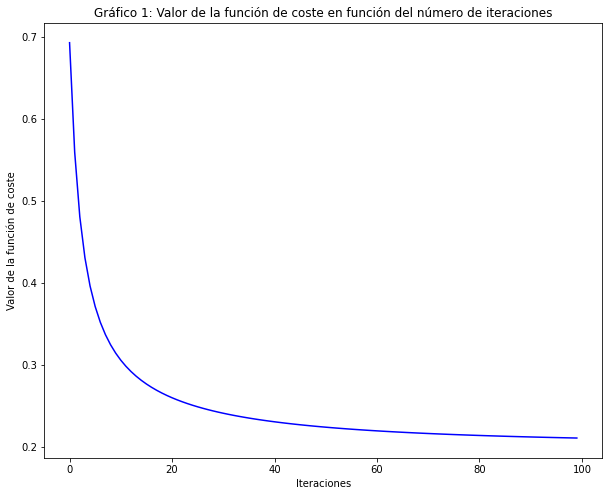

In [14]:
f, ax = plt.subplots(figsize=(10, 8))  #Tamaño del gráfico
plt.plot(costs, color="blue")  #Contrucción a partir del objeto de coste

plt.xlabel("Iteraciones")  #Títutlo del eje X.
plt.ylabel("Valor de la función de coste")  #Título del eje Y.
plt.title("Gráfico 1: Valor de la función de coste en función del número de iteraciones")
#Título del gráfico.

En este caso, al introducir 100 iteraciones se ve a la función descender claramente. Sin embargo, parece que con 100 iteraciones aún no ha caído del todo, por lo que pueden añadirse más iteraciones y observar cómo se comporta la gráfica. Por ello, se puede probar aumentando el número de iteraciones.

In [15]:
#Con 1000 iteraciones
theta, costs = gradiente(X, y, theta_init, 1, 1000)

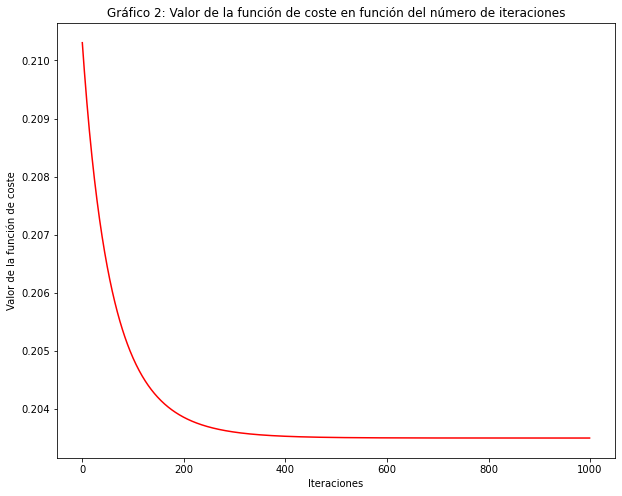

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
plt.plot(costs, color="red")

plt.xlabel("Iteraciones")
plt.ylabel("Valor de la función de coste")
plt.title("Gráfico 2: Valor de la función de coste en función del número de iteraciones");

Como se puede sustraer del gráfico anterior, 1000 iteraciones es excesivo, pues la función de coste cae mucho antes. Entre el valor 300 y 400 parece que alcanza un punto desde el que no desciende significativamente después. Por ello, probaremos ahora con 400 iteraciones, pues parecen más que suficientes para observar la caída de la función de coste.

In [17]:
#Con 450 iteraciones
theta, costs = gradiente(X, y, theta_init, 1, 450)

Text(0.5, 1.0, 'Gráfico 2: Valor de la función de coste en función del número de iteraciones')

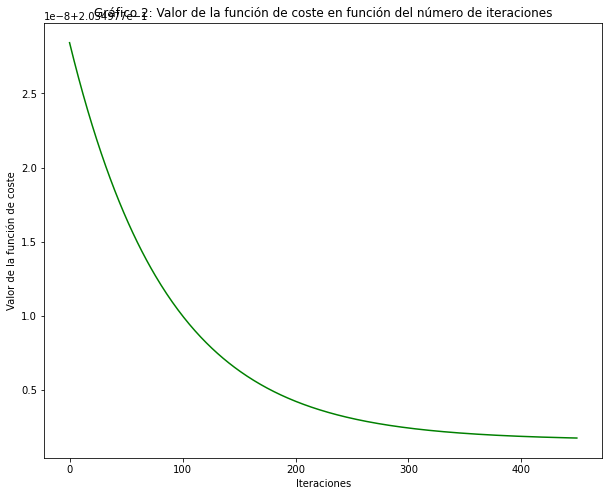

In [18]:
f, ax = plt.subplots(figsize=(10, 8))
plt.plot(costs, color="green")

plt.xlabel("Iteraciones")
plt.ylabel("Valor de la función de coste")
plt.title("Gráfico 2: Valor de la función de coste en función del número de iteraciones")

Y teniendo esto, se puede calcular el valor más bajo de la función de coste. El dato es el siguiente:

In [19]:
print("Resultado del coste:", costs[-1]) #Ofrece el valor del coste más bajo con esos datos.

Resultado del coste: 0.20349770174443152


Para contrastar, también se puede modificar el parámetro alpha, que representa la tasa de aprendizaje del algoritmo. Esto haría que los "pasos" que se dan en cada iteración fueran más grandes, aumentando lo que sería la learning rate o tasa de aprendizaje. Por lo tanto, cabe pensar en que a mayor alpha se especifique, menor número de iteraciones serán necesarias ya que el algoritmo aprenderá más rápido.

In [20]:
#Con alpha = 2
theta, costs = gradiente(X, y, theta_init, 2, 400)

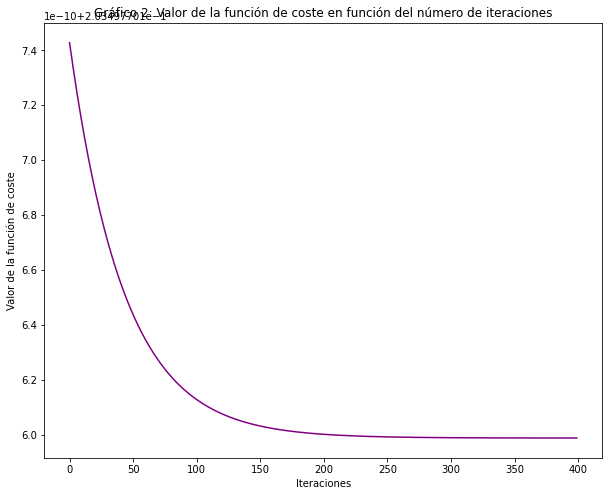

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
plt.plot(costs, color="purple")

plt.xlabel("Iteraciones")
plt.ylabel("Valor de la función de coste")
plt.title("Gráfico 2: Valor de la función de coste en función del número de iteraciones");

Parece que, lógicamente, al aumentar el valor de alpha de 1 a 2, serían necesarias menos iteraciones para poder alcanzar el menor de valor de la función de coste.

# Referencias
- https://es.qaz.wiki/wiki/Sigmoid_function
- https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1
- https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f
- https://towardsdatascience.com/andrew-ngs-machine-learning-course-in-python-logistic-regression-c0ae25509feb
- https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c
- https://blog.paperspace.com/part-1-generic-python-implementation-of-gradient-descent-for-nn-optimization/
- https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78
- https://seaborn.pydata.org/examples/different_scatter_variables.html
- https://numpy.org/doc/stable/index.html